In [17]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [18]:
words=open("names.txt","r").read().splitlines()

In [19]:
len(words)

32033

In [20]:
# lets make a mapping from string to int and from int to string
temp=sorted(list(set("".join(words))))
stoi={s:i+1 for i,s in enumerate(temp)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [21]:
block_size=3
X,Y=[],[]
for w in words:
    context=[0]*block_size
    for ch in w+'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        #print("".join(itos[i] for i in context),'--->',itos[ix])
        context=context[1:]+[ix]

X=torch.tensor(X)
Y=torch.tensor(Y)

In [22]:
X.shape,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [23]:
C=torch.randn((27,2))

In [24]:
X[13,2]

tensor(1)

In [25]:
C[X][13,2]

tensor([ 1.6951, -0.4229])

In [26]:
# this is the embedding
emb=C[X]

In [27]:
emb.shape

torch.Size([228146, 3, 2])

In [28]:
emb[:,0,:].shape

torch.Size([228146, 2])

In [29]:
#weight and bias
W1=torch.randn((6,100))
b1=torch.randn(100)

In [30]:
len(torch.unbind(emb,1))

3

In [31]:
emb.shape

torch.Size([228146, 3, 2])

In [34]:
h=torch.tanh(emb.view(-1,6) @ W1 +b1)

In [35]:
W2=torch.randn(100,27)
b2=torch.randn(27)  

In [36]:
logits=h@W2 + b2

In [37]:
logits

tensor([[  1.8170,  -1.9150,  -0.6397,  ...,  -0.2625,  12.5922, -25.8678],
        [  3.5879,   1.1730,  -5.1620,  ...,  -0.7861,   9.4559, -16.2662],
        [ 10.7541,  -2.5347,   1.8658,  ...,  -0.9201,  12.6078,  -9.6756],
        ...,
        [ -1.2118,   2.7877,  -4.0255,  ...,   7.8368,  -8.5870,   9.1743],
        [ -3.7653,   0.6101,   2.7649,  ...,   6.3913,   2.2204,   3.2907],
        [ -4.1575,   8.5410,  -0.0566,  ...,   6.4185,  -2.2700,   0.2710]])

In [38]:
logits.shape

torch.Size([228146, 27])

In [39]:
counts=logits.exp()

In [40]:
prob=counts/counts.sum(1,keepdims=True)

In [41]:
prob

tensor([[4.2540e-07, 1.0186e-08, 3.6466e-08,  ..., 5.3176e-08, 2.0344e-02,
         4.0314e-19],
        [2.7003e-04, 2.4134e-05, 4.2793e-08,  ..., 3.4027e-06, 9.5465e-02,
         6.4402e-13],
        [6.1208e-02, 1.0364e-07, 8.4456e-06,  ..., 5.2090e-07, 3.9069e-01,
         8.2087e-11],
        ...,
        [8.3796e-06, 4.5727e-04, 5.0263e-07,  ..., 7.1284e-02, 5.2508e-09,
         2.7153e-01],
        [6.8642e-07, 5.4552e-05, 4.7057e-04,  ..., 1.7682e-02, 2.7298e-04,
         7.9613e-04],
        [8.2609e-11, 2.7034e-05, 4.9891e-09,  ..., 3.2369e-06, 5.4548e-10,
         6.9231e-09]])

In [42]:
prob.shape

torch.Size([228146, 27])

# lets train the model one elemente at a time

In [45]:
g = torch.Generator().manual_seed(2147483647)

In [46]:
C=torch.randn((27,2),generator=g,requires_grad=True)
W1=torch.randn((6,100),generator=g,requires_grad=True)
b1=torch.randn(100,generator=g,requires_grad=True)
W2=torch.randn((100,27),generator=g,requires_grad=True)
b2=torch.randn(27,generator=g,requires_grad=True)
parameters=[C,W1,b1,W2,b2]

In [47]:
sum(p.nelement() for p in parameters)

3481

In [48]:
for p in parameters:
    p.requires_grad=True

In [49]:
for _ in range(100):
    emb=C[X]
    #feed forward
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) # this is the first hidden layer
    logits=h @ W2 +b2
    loss=F.cross_entropy(logits,Y)
    print(loss)
    # the backwrd
    for p in parameters:
        p.grad=None
    
    #back prop
    loss.backward()
    
    #update the weig
    for p in parameters:
        p.data+= -0.01*p.grad

tensor(19.5052, grad_fn=<NllLossBackward0>)
tensor(19.1391, grad_fn=<NllLossBackward0>)
tensor(18.8242, grad_fn=<NllLossBackward0>)
tensor(18.5540, grad_fn=<NllLossBackward0>)
tensor(18.3130, grad_fn=<NllLossBackward0>)
tensor(18.0913, grad_fn=<NllLossBackward0>)
tensor(17.8840, grad_fn=<NllLossBackward0>)
tensor(17.6888, grad_fn=<NllLossBackward0>)
tensor(17.5042, grad_fn=<NllLossBackward0>)
tensor(17.3294, grad_fn=<NllLossBackward0>)
tensor(17.1639, grad_fn=<NllLossBackward0>)
tensor(17.0072, grad_fn=<NllLossBackward0>)
tensor(16.8587, grad_fn=<NllLossBackward0>)
tensor(16.7177, grad_fn=<NllLossBackward0>)
tensor(16.5834, grad_fn=<NllLossBackward0>)
tensor(16.4550, grad_fn=<NllLossBackward0>)
tensor(16.3314, grad_fn=<NllLossBackward0>)
tensor(16.2122, grad_fn=<NllLossBackward0>)
tensor(16.0965, grad_fn=<NllLossBackward0>)
tensor(15.9839, grad_fn=<NllLossBackward0>)
tensor(15.8741, grad_fn=<NllLossBackward0>)
tensor(15.7667, grad_fn=<NllLossBackward0>)
tensor(15.6614, grad_fn=<NllLoss

# with mini batches training....expected to be much faster

In [50]:
for _ in range(100):
    xi=torch.randint(0,X.shape[0],(32,))  # we bathcing the training set into batches of 32
    emb=C[X[xi]]
    #feed forward
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) # this is the first hidden layer
    logits=h @ W2 +b2
    loss=F.cross_entropy(logits,Y[xi])
    #print(loss.item())
    # the backwrd
    for p in parameters:
        p.grad=None
    
    #back prop
    loss.backward()
    
    #update the weig
    for p in parameters:
        p.data+= -0.01*p.grad
print(loss.item())  # this is the batch loss

8.950396537780762


In [51]:
emb=C[X]
h=torch.tanh(emb.view(-1,6) @ W1 +b1)
logits=h @ W2 +b2
loss=F.cross_entropy(logits,Y)
loss.item()

8.37658405303955

# lets do a learning rate adjustment

In [52]:
C=torch.randn((27,2),generator=g,requires_grad=True)
W1=torch.randn((6,100),generator=g,requires_grad=True)
b1=torch.randn(100,generator=g,requires_grad=True)
W2=torch.randn((100,27),generator=g,requires_grad=True)
b2=torch.randn(27,generator=g,requires_grad=True)
parameters=[C,W1,b1,W2,b2]

In [53]:
lre=torch.linspace(-3,0,1000)
lrs=lre**10

In [54]:
lri=[]
lossi=[]

In [55]:
for i in range(10000):
    
    xi=torch.randint(0,X.shape[0],(32,))  # we bathcing the training set into batches of 32
    emb=C[X[xi]]
    #feed forward
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) # this is the first hidden layer
    logits=h @ W2 +b2
    loss=F.cross_entropy(logits,Y[xi])
    #print(loss.item())
    # the backwrd
    for p in parameters:
        p.grad=None
    
    #back prop
    loss.backward()

    #update the weig
    for p in parameters:
        #p.data+= -lre[i]*p.grad
        p.data+= -0.1*p.grad
        
    #lets save the parameters
    #lri.append(lre[i])
    lossi.append(loss.item())
    
print(loss.item())  # this is the batch loss

2.7451956272125244


In [56]:
emb=C[X]
h=torch.tanh(emb.view(-1,6) @ W1 +b1)
logits=h @ W2 +b2
loss=F.cross_entropy(logits,Y)
loss.item()

2.4502949714660645

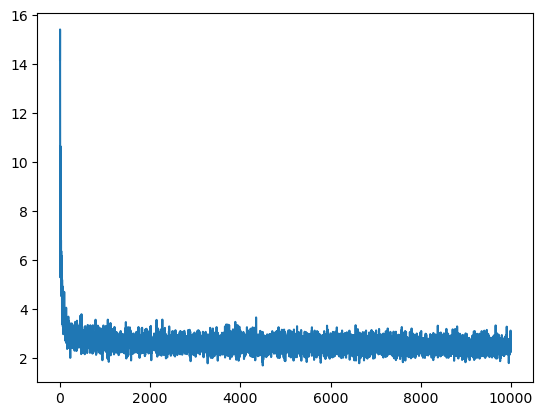

In [57]:
plt.plot(lossi)

# lets seperate our data into training and validating sets

In [58]:
import random
random.seed(42)

In [125]:
def build_dataset(words):
    ''' separated the data/words into traingin,validating and testing set and train
     on the training data'''
    
    block_size=3
    X,Y=[],[]
    for w in words:
        context=[0]*block_size
        for ch in w+'.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            #print("".join(itos[i] for i in context),'--->',itos[ix])
            context=context[1:]+[ix]
    
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    return X,Y


random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

xtr,ytr=build_dataset(words[:n1])
xval,yval=build_dataset(words[n1:n2])
xtest,ytest=build_dataset(words[n2:])

In [100]:
C=torch.randn((27,2),generator=g)
W1=torch.randn((6,300),generator=g)
b1=torch.randn(300,generator=g)
W2=torch.randn((300,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [101]:
lre=torch.linspace(-3,0,1000)
lrs=lre**10

In [102]:
lri=[]
lossi=[]
steps=[]

In [103]:
for p in parameters:
    p.requires_grad=True

In [104]:
emb.shape

torch.Size([22827, 3, 2])

In [105]:
emb=C[xtr]
h=torch.tanh(emb.view(-1,6)@W1 + b1)
logits=h@W2+b2
loss=F.cross_entropy(logits,ytr)

In [106]:
xtr.shape,ytr.shape

(torch.Size([182473, 3]), torch.Size([182473]))

In [107]:
xval.shape,yval.shape

(torch.Size([22827, 3]), torch.Size([22827]))

In [108]:
xtest.shape,ytest.shape

(torch.Size([22846, 3]), torch.Size([22846]))

In [114]:
# train on batches of training set
for i in range(10000):
    
    xi=torch.randint(0,xtr.shape[0],(32,))  # we bathcing the training set into batches of 32
    emb=C[xtr[xi]]
    #feed forward
    h=torch.tanh(emb.view(-1,6) @ W1 + b1) # this is the first hidden layer
    logits=h @ W2 +b2
    loss=F.cross_entropy(logits,ytr[xi])
    #print(loss.item())
    # the backwrd
    for p in parameters:
        p.grad=None
    
    #back prop
    loss.backward()

    #update the weig
    for p in parameters:
        #p.data+= -lre[i]*p.grad
        p.data+= -0.01*p.grad
        
    #lets save the parameters
    #lri.append(lre[i])
    steps.append(i)
    lossi.append(loss.item())
    
print(loss.item())  # this is the batch loss

2.438992500305176


In [115]:
emb=C[xval]
h=torch.tanh(emb.view(-1,6) @ W1 +b1)
logits=h@W2 +b2
loss=F.cross_entropy(logits,yval)

In [116]:
loss.item()

2.496100664138794

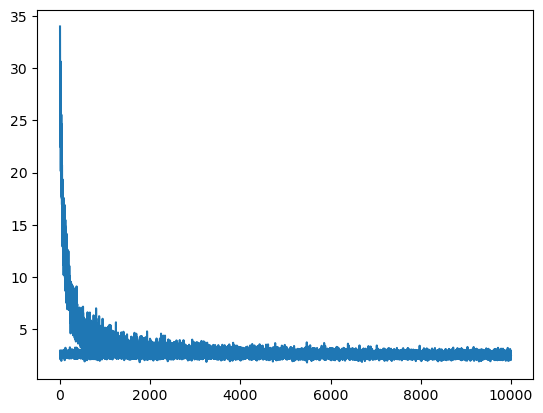

In [117]:
plt.plot(steps,lossi)

# lets plot the embedding of the charachters

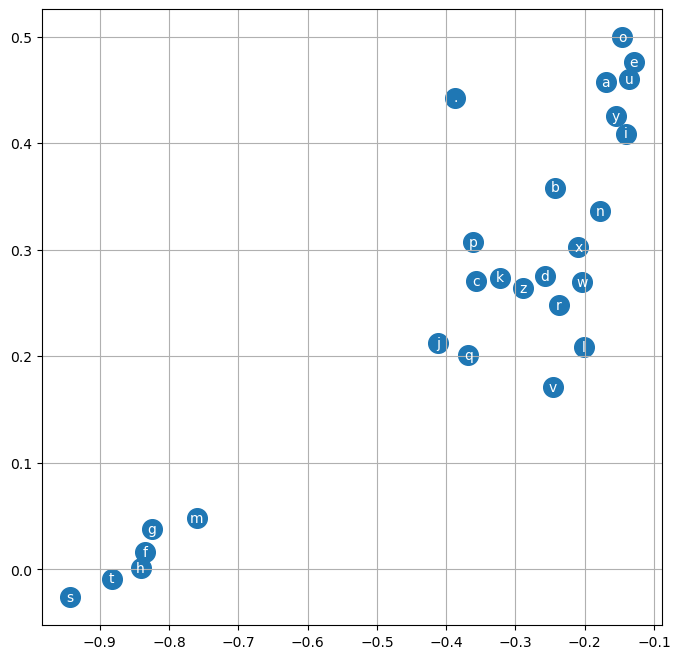

In [120]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid('minor')

# lets make our vector embedding big

In [127]:
C=torch.randn((27,10),generator=g)
W1=torch.randn((30,200),generator=g)
b1=torch.randn(200,generator=g)
W2=torch.randn((200,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [128]:
sum(p.nelement() for p in parameters)

11897

In [130]:
for p in parameters:
    p.requires_grad=True

In [140]:
lre=torch.linspace(-3,0,1000)
lrs=lre**10

In [133]:
lri=[]
lossi=[]
steps=[]

In [141]:
# train on batches of training set
for i in range(200000):
    
    xi=torch.randint(0,xtr.shape[0],(32,))  # we bathcing the training set into batches of 32
    emb=C[xtr[xi]]
    #feed forward
    h=torch.tanh(emb.view(-1,30) @ W1 + b1) # this is the first hidden layer
    logits=h @ W2 +b2
    loss=F.cross_entropy(logits,ytr[xi])
    #print(loss.item())
    # the backwrd
    for p in parameters:
        p.grad=None
    
    #back prop
    loss.backward()

    #update the weig
    for p in parameters:
        #update the learning rate
        lr=0.1 if i<100000 else 0.01
        p.data+= -0.1*p.grad
        
    #lets save the parameters
    #lri.append(lre[i])
    steps.append(i)
    lossi.append(loss.log10().item())  #this is the log loss 
    
print(loss.item())  # this is the batch loss

2.129751682281494


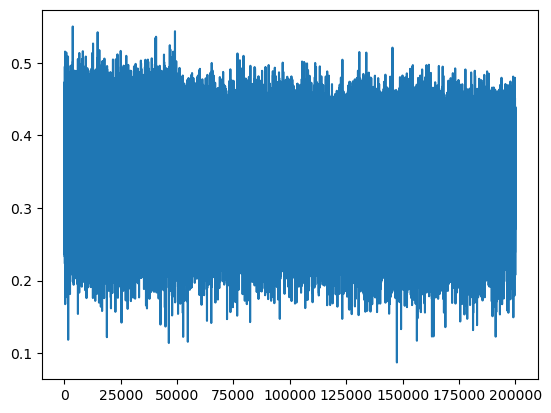

In [142]:
plt.plot(steps,lossi)

In [143]:
emb=C[xval]
h=torch.tanh(emb.view(-1,30) @ W1 +b1)
logits=h@W2 +b2
loss=F.cross_entropy(logits,yval)
loss.item()

2.228083372116089

# and know lets the name our neural net can come up with

In [164]:
context=[0]*block_size
C[torch.tensor(context)].shape

torch.Size([3, 10])

In [154]:
g=torch.Generator().manual_seed(2147483647 + 10)
for _ in range(20):
    out=[]
    context=[0]*block_size #this is a 1*block_size
    while True:
        emb=C[torch.tensor([context])]  
        h=torch.tanh(emb.view(1,-1) @ W1 +b1)
        logits=h@W2+b2
        probs=torch.softmax(logits,1)
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
    print("".join (itos[i] for i in out))

mohajimya.
zeee.
med.
millo.
everstendraeg.
adee.
dee.
ivonni.
jenrikeiseson.
arleigh.
moharlin.
shervis.
himier.
jenie.
jevionnie.
couu.
mather.
jamilianki.
kayjahsin.
deshil.
